In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")
plt.rcParams['figure.figsize'] = [20, 10]

In [6]:
stations = pd.read_csv('../data/modelInput/stations.csv')

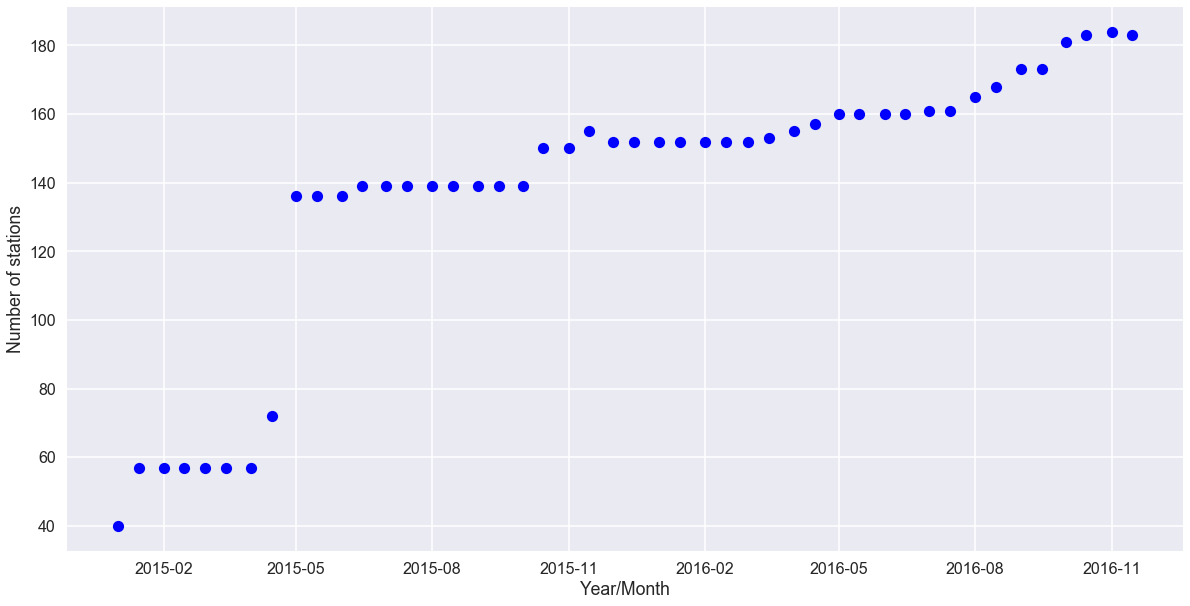

In [7]:
#plot the varying number of stations for each month 
station_count = pd.DataFrame({'station_count' : []})
iterator = stations.iterrows()
for row in iterator:
    index = pd.date_range(row[1].first_used, row[1].last_used, freq='SMS')
    station_count = station_count.append(pd.DataFrame(1, index=index, columns=['station_count']))
    
station_count['station_count'] = station_count['station_count'].astype(int)
station_count = station_count.reset_index()
station_count = station_count.rename(columns={'index': 'month'})
station_count = station_count.groupby('month').sum()

plt.xlabel('Year/Month')
plt.ylabel('Number of stations')
plt.plot(station_count, 'bo')
plt.show()

In [8]:
#The number of stations rises significantly in May 2015.
#For all further analysis and model training we will use only the data
#from April 2015 through November 2016.
stations['first_used'] = stations['first_used'].apply(pd.Timestamp)
stations['last_used'] = stations['last_used'].apply(pd.Timestamp)
stations = stations[(stations['first_used'] <= pd.Timestamp(2015, 5, 1))
                    & (stations['last_used'] >= pd.Timestamp(2016, 11, 30))]
stations = stations.set_index('station_id')
stations.to_csv('../data/modelInput/stations_201505_201611.csv')

In [14]:
trips = pd.read_csv('../data/raw/201501-201611-hubway-tripdata.csv')
trips['starttime'] = trips['starttime'].apply(pd.Timestamp)
trips = trips.set_index('starttime')
trips = trips.sort_index()
trips = trips[pd.Timestamp(2015, 5, 1):]

In [15]:
trips.shape

(2234329, 9)

In [ ]:
trips.to_csv('../data/raw/201505-201611-hubway-tripdata.csv')